In [237]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [174]:
#Creamos un data frame con los datos del voltaje obtenidos
df = pd.read_csv('RecorridoATravesDeLeonGto.csv')
print(df)

        Voltaje  Unnamed: 1
0           0.0         NaN
1           0.0         NaN
2           0.0         NaN
3           0.0         NaN
4           0.0         NaN
...         ...         ...
129510      0.0         NaN
129511      0.0         NaN
129512      0.0         NaN
129513      0.0         NaN
129514      0.0         NaN

[129515 rows x 2 columns]


In [175]:
#Nuestros datos venian como string asi que los tranformamos a un valor numerico
df.Voltaje = pd.to_numeric(df.Voltaje)
#Verificamos
print(type(df.Voltaje[0]))

<class 'numpy.float64'>


In [176]:
#Revisamos algunas estadisticas para buscar outliers (datos atipicos)
print(df.Voltaje.max())#BINGO!
print(df.Voltaje.min())
print(df.Voltaje.mean())

99.0
0.0
2.764896907127115


In [177]:
#El sensor tomo lecturas medio raras, el Arduino no deberia haber detectado mas de 5 V
df.Voltaje.sort_values(ascending=False)#ordenamos para ver

45502     99.0
40918     99.0
18821     99.0
16649     99.0
30052     99.0
          ... 
127455     NaN
128061     NaN
128181     NaN
129387     NaN
129507     NaN
Name: Voltaje, Length: 129515, dtype: float64

In [197]:
#Hay que eliminar eso datos y hacesmos una copia para no perder los datos originales
df_copy = df.Voltaje

In [198]:
#Encontramos los indices de los valores que queremos quitar
index_drop = []
j=0
for i in df_copy:
    j+=1
    if i > 5:
        index_drop.append(j)
print(index_drop)


[2168, 2289, 2409, 3374, 3494, 4340, 4460, 5184, 6030, 6390, 7236, 7356, 7476, 8322, 8442, 8562, 8682, 9648, 9768, 9888, 10854, 11940, 12666, 12786, 13872, 13992, 14598, 14718, 14838, 15924, 16650, 16770, 17616, 17736, 18582, 18822, 20513, 20633, 20753, 21479, 22325, 22445, 23171, 23291, 23411, 24017, 24137, 24257, 26069, 26189, 26309, 27155, 27275, 28121, 28241, 29087, 29207, 29327, 30053, 30173, 30293, 32225, 32345, 32465, 33311, 33431, 33551, 34397, 34637, 35363, 35483, 36209, 36329, 36449, 37415, 38141, 39107, 39953, 40073, 40193, 40313, 40919, 41039, 41159, 41279, 42005, 42125, 42245, 45503, 46109, 46229, 46349, 46469, 47075, 47195, 47315, 47435, 47555, 48641, 48761, 49727, 53951, 54071, 54191, 54311, 55037, 55157, 55277, 58781, 59747, 60833, 60953, 61799, 61919, 62645, 63491, 67721, 67841, 67961, 68805, 68925, 69045, 69165, 69891, 70011, 70131, 70251, 71097, 71217, 72182, 72302, 72422, 75439, 76405, 76525, 77371, 78217, 78337, 78457, 79423, 80269, 80389, 81355, 81475, 82441, 8256

In [199]:
#Eliminamos esos datos de nuestro data frame df_copy
df_copy = df_copy.drop(index_drop)

In [211]:
#Tomamos los datos limpios de otro archivo cvs
df_clean = pd.read_csv('DatosLimpios.csv')

In [235]:
#Revisamos los datos y sus metricas
print(df_clean)
#Descripcion general
df_clean.describe()

        Voltaje
0           0.0
1           0.0
2           0.0
3           0.0
4           0.0
...         ...
128910      0.0
128911      0.0
128912      0.0
128913      0.0
128914      0.0

[128915 rows x 1 columns]


,Voltaje
count,128915.000000
mean,2.666907
std,1.657561
min,0.000000
25%,1.500000
50%,2.930000
75%,3.990000
max,5.000000


Al graficar podemos ver un poco como el voltaje (manchas azules), vario bastante a traves de un recorrido en auto con una velocidad por debajo de los 65 km/hr, sin embargo este voltaje se encuentra en su mayoria en los 4V.
Por lo que con un regulador de voltaje, facilmente lograria alimentar a un aparato con 5 vols constantes en un trayecto como este.
Con lo que lograriamos cargar un telefono celular.

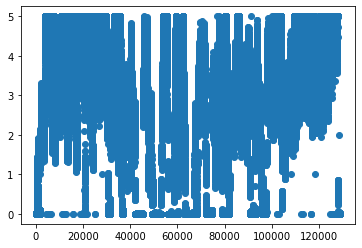

In [243]:
#Ahora los graficamos
fig, ax = plt.subplots()
ax.scatter(range(128915),df_clean.Voltaje)
plt.show()